<a href="https://colab.research.google.com/github/shashank651156/ML/blob/main/filght_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Clean_Dataset.csv')



In [ ]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
# Since, we have a less number of airlines, sources, destinations, we can use one hot encoding

In [ ]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [ ]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [ ]:
df['duration']

,duration
0,2.17
1,2.33
2,2.17
3,2.25
4,2.33
...,...
300148,10.08
300149,10.42
300150,13.83
300151,10.00


In [ ]:
df['duration'].value_counts()

,count
duration,
2.17,4242
2.25,4036
2.75,2879
2.08,2755
2.83,2323
...,...
37.17,1
38.75,1
38.50,1


In [ ]:
df['duration'].min()

0.83

In [ ]:
df['duration'].max()

49.83

Preprocessing

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:

df = df.drop('flight', axis = 1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [ ]:
df.stops = pd.factorize(df.stops)[0]

In [ ]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination_city')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time', axis=1)

In [ ]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
df = df * 1

In [ ]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


**Training Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X, y = df.drop('price', axis = 1), df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
reg.score(X_test, y_test)

0.9852525815909967

1. mean_absolute_error: This function calculates the Mean Absolute Error (MAE) of your regression model. MAE measures the average absolute difference between the predicted values and the true values. It gives you an idea of how far off your predictions are on average.

2. mean_squared_error: This function calculates the Mean Squared Error (MSE) of your regression model. MSE measures the average squared difference between the predicted values and the true values. It penalizes larger errors more heavily than MAE.

3. r2_score: This function calculates the R-squared (R2) score of your regression model. R2 measures the proportion of the variance in the dependent variable (the thing you're trying to predict) that is explained by the independent variables (the features you're using to make predictions). It gives you an idea of how well your model fits the data, with values closer to 1 indicating a better fit.

In [ ]:
#let's get some more metrics
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RSME:', math.sqrt(mean_squared_error(y_test, y_pred)))
print()
#just 2 places after decimal
print('R2: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RSME: {:.2f}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

R2: 0.9852525815909967
MAE: 1079.2227848286082
MSE: 7597964.297244505
RSME: 2756.4405121904056

R2: 0.99
MAE: 1079.22
MSE: 7597964.30
RSME: 2756.44


Text(0, 0.5, 'Predicted flight price')

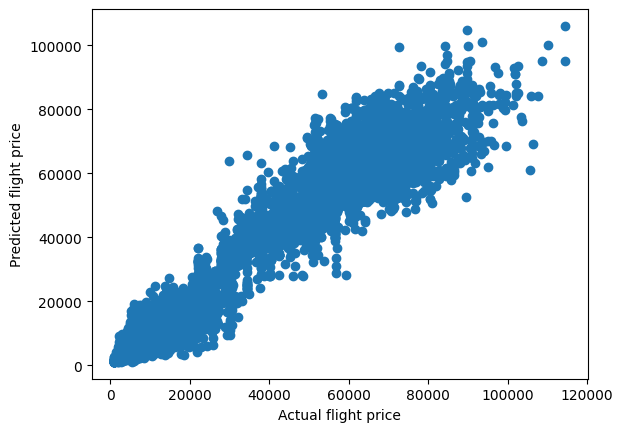

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')

In [ ]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [ ]:
# Searched sorted featire importances RandomForestRegressor from internet

In [ ]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x:x[1], reverse = True)
# sorted_importances

<BarContainer object of 10 artists>

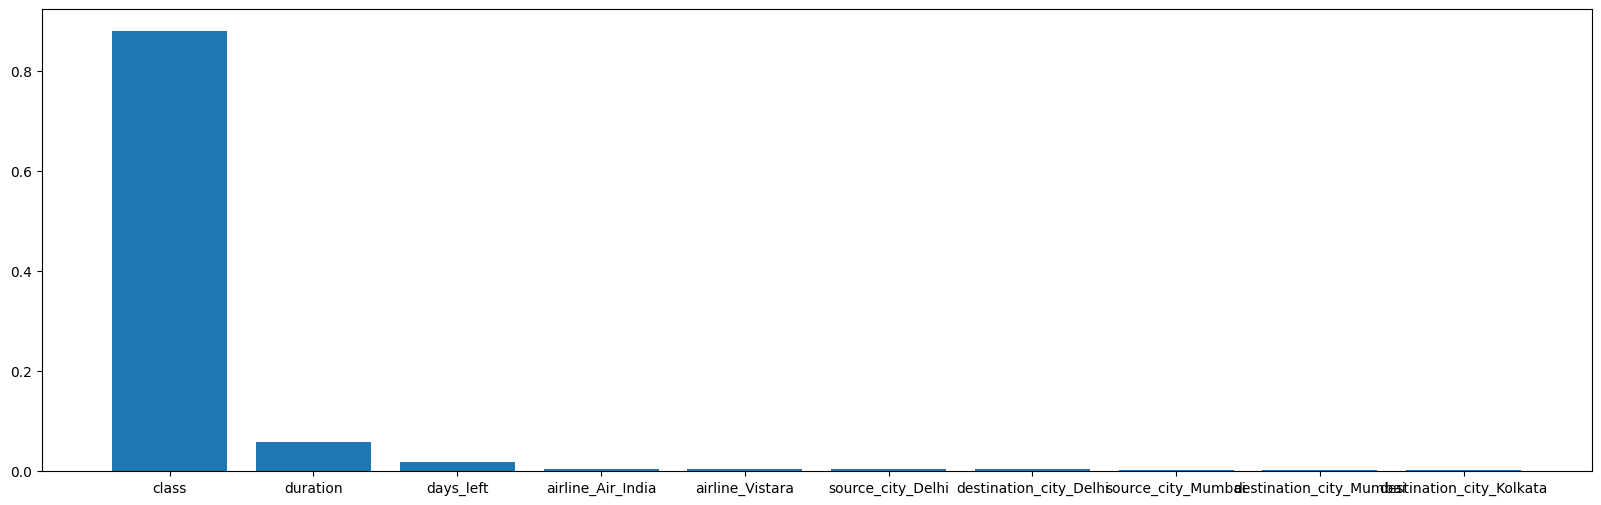

In [ ]:
plt.figure(figsize = (20, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
# # hyper parameteres tuning (fining tuing the hyper parameters)
# from sklearn.model_selection import GridSearchCV
# reg = RandomForestRegressor(n_jobs=-1)
# param_grid = {
#     'n_estimators' : [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }
# grid_search = GridSearchCV(reg, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# # now, If we run these then this is gonnaa take forever to run, so, we'll use randomize and run only for as single test case

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist=  {
    'n_estimators' : randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator = reg, param_distributions = param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)
random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 

In [ ]:
best_regressor.score(X_test)

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = best_regressor.predict(X_test)

print('R2: {:.2f}'.format(r2_score(y_test, y_pred)))
print('MAE: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('RSME: {:.2f}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))